In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
sales_df = pd.read_excel("Sales_Data.xlsx")
sales_df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales$,Discount$,ShippingCost$
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,13.09800,6.985600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,36.59700,19.518400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,1.90060,0.389867
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,57.45465,22.343475
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,3.35520,0.521920


The data consist of sales transaction logs from a retail company.

This is what the columns represent:

* Row ID: a unique identifier for each row in the dataset.
* Order ID: a unique identifier for each order placed.
* Order Date: the date when the order was placed.
* Ship Date: the date when the order was shipped.
* Ship Mode: the shipping method chosen for the order.
* Customer ID: a unique identifier for each customer.
* Customer Name: the name of the customer who placed the order.
* Segment: the market segment of the customer.
* Country: the country where the order was placed.
* City: the city where the order was placed.
* State: the state where the order was placed.
* Postal Code: the postal code of the shipping address.
* Region: the region within the country where the order was placed.
* Product ID: a unique identifier for each product sold.
* Category: the category of the product.
* Sub-Category: the sub-category of the product.
* Product Name: the name of the product.
* Sales: the sales amount for the order.
* Discount: the discount amount applied to the order.
* ShippingCost: the shipping cost for the order.

$\textbf{Example}$: The first row contains a transaction where a customer named Claire Gute placed an order for a bookcase from the Bush Somerset Collection. The order was placed on November 8, 2017, and shipped on November 11, 2017, using Second Class shipping. The order was shipped to Henderson, Kentucky, and the sales amount was 261.96 dollars, with a discount of 13.098 dollars and a shipping cost of 6.9856 dollars. 

1 - $\textbf{Calculate the total sales revenue for the entire dataset}$

In [4]:
# Calculate the total sales revenue
tot_sales_revenue = sales_df['Sales$'].sum()
# Display the result
print(f"Total sales revenue: ${round(tot_sales_revenue)}")

Total sales revenue: $2259610


2 - $\textbf{Identify the top-selling products and product categories based on sales.}$

a) $\textit{Top-selling products}$

In [5]:
# Group by product and get the total sales for each product
prod_sales = sales_df.groupby('Product Name')['Sales$'].sum().reset_index()

# Sort the products by total sales in a descending order
top_selling_prods = prod_sales.sort_values(by='Sales$', ascending=False)

print("Top 5 selling products based on sales:")
top_selling_prods.head(5)

Top 5 selling products based on sales:


,Product Name,Sales$
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479


b) $\textit{Top-selling product categories}$

In [6]:
# Group by category and get the total sales for each category
categ_sales = sales_df.groupby('Category')['Sales$'].sum().reset_index()

# Sort the categories by total sales in a descending order
top_selling_categs = categ_sales.sort_values(by='Sales$', ascending=False)

print("Top-selling categories by sales:")
top_selling_categs.head(5)

Top-selling categories by sales:


,Category,Sales$
2,Technology,825528.9370
0,Furniture,728658.5757
1,Office Supplies,705422.3340


3 - $\textbf{ Group the sales by month and make a plot of the total monthly sales. is it increasing, decreasing,
or steady?}$

In [7]:
# Transform the 'Order Date' column to datetime
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales$,Discount$,ShippingCost$
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,13.09800,6.985600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,36.59700,19.518400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,1.90060,0.389867
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,57.45465,22.343475
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,3.35520,0.521920


In [8]:
print(f"The earliest order date is: {str(sales_df['Order Date'].min())}")
print('--------------')
print(f"The latest order date is: {str(sales_df['Order Date'].max())}")

The earliest order date is: 2015-01-03 00:00:00
--------------
The latest order date is: 2018-12-30 00:00:00


In [9]:
# Extract the year and month from the 'Order Date' column
sales_df['year-month-order'] = sales_df['Order Date'].dt.to_period('M')
sales_df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales$,Discount$,ShippingCost$,year-month-order
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,13.0980,6.985600,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,36.5970,19.518400,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,1.9006,0.389867,2017-06


In [10]:
# Group by the 'Year-Month' and sum the sales
monthly_sales = sales_df.groupby('year-month-order')['Sales$'].sum().reset_index()
monthly_sales

,year-month-order,Sales$
0,2015-01,14205.7070
1,2015-02,4519.8920
2,2015-03,55205.7970
3,2015-04,27790.0710
4,2015-05,23644.3030
5,2015-06,34322.9356
6,2015-07,33781.5430
7,2015-08,27117.5365
8,2015-09,81623.5268
9,2015-10,31453.3930


In [11]:
# Convert 'Year-Month' back to datetime for plotting
monthly_sales['year-month-order'] = monthly_sales['year-month-order'].dt.to_timestamp()

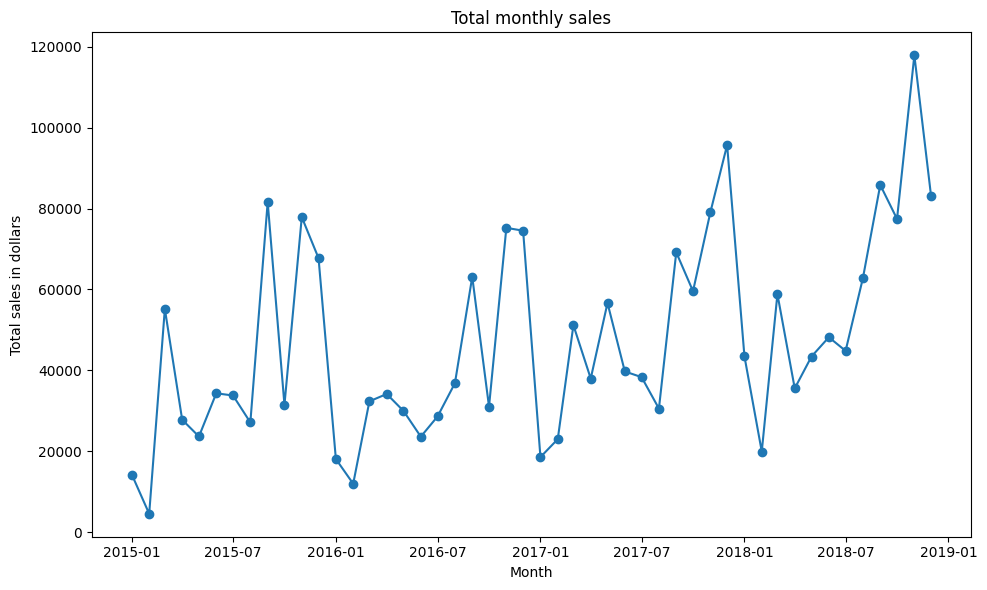

In [12]:
# Plot the total monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['year-month-order'], monthly_sales['Sales$'], marker='o')
plt.title('Total monthly sales')
plt.xlabel('Month')
plt.ylabel('Total sales in dollars')
plt.tight_layout()
plt.show()


#### Conclusion: The overall trend of the total monthly sales is increasing. Despite some short-term fluctuations, the long-term trajectory shows growth in sales over the years.


4 - $\textbf{Explore the correlation between sales and discount, and shipping cost.}$

In [13]:
# Select the columns needed for correlation
correl_data = sales_df[['Sales$', 'Discount$', 'ShippingCost$']]

# Get the correlation matrix
correl_matrix = correl_data.corr()
print(correl_matrix)


                 Sales$  Discount$  ShippingCost$
Sales$         1.000000   0.904085       0.992095
Discount$      0.904085   1.000000       0.906014
ShippingCost$  0.992095   0.906014       1.000000


### Sales and Discount:

Correlation coefficient: 0.904485 

There is a strong positive correlation between Sales and Discount. This means that as the sales amount increases, the discount amount tends to increase as well.


### Sales and ShippingCost:

Correlation coefficient: 0.992095 

There is an very strong positive correlation between Sales and ShippingCost. This indicates that as the sales amount increases, the shipping cost also increases very closely.


### Discount and ShippingCost:

Correlation coefficient: 0.906014 

There is a strong positive correlation between Discount and ShippingCost. This means that higher discounts are associated with higher shipping costs.

5 - $\textbf{Make an histogram of the sales. Does it look like a normal distribution?}$

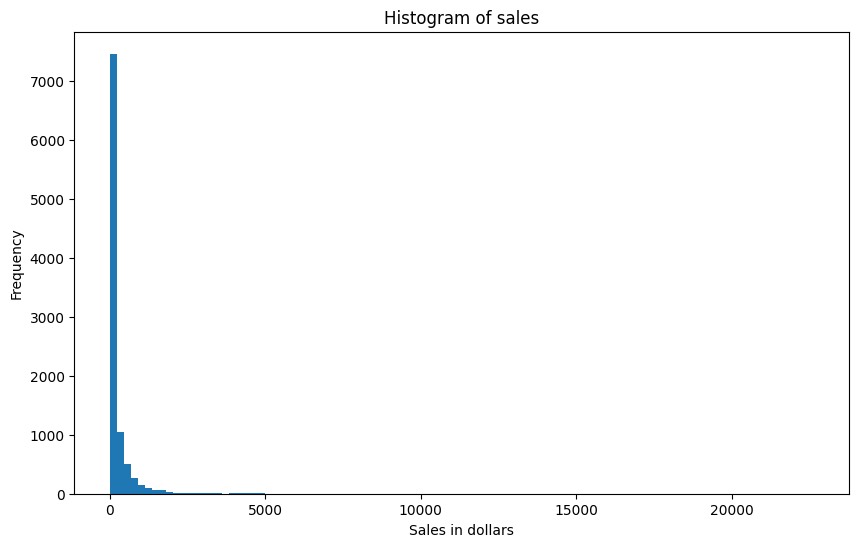

In [14]:
# Plot the histogram of the sales data
plt.figure(figsize=(10, 6))
plt.hist(sales_df['Sales$'], bins=100)
plt.title('Histogram of sales')
plt.xlabel('Sales in dollars')
plt.ylabel('Frequency')
plt.show()

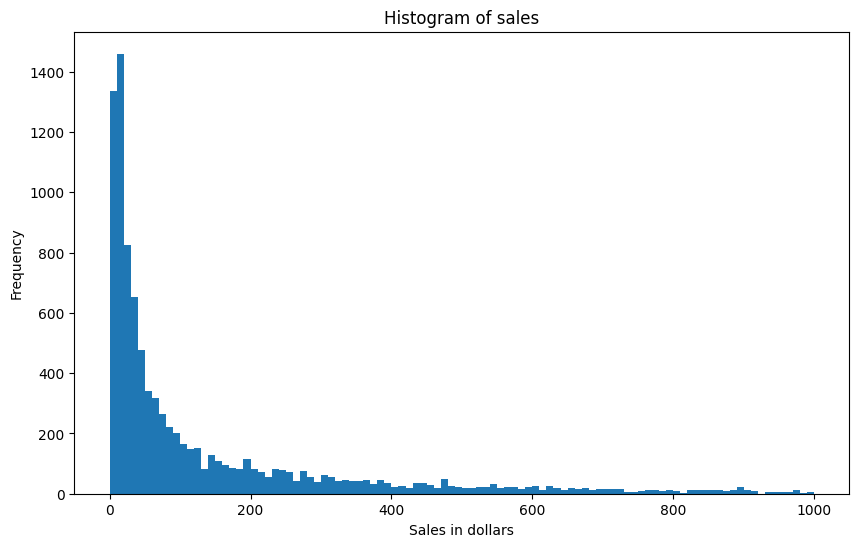

In [15]:
# Plot the histogram of the sales data with x-axis limited to 1000
plt.figure(figsize=(10, 6))
plt.hist(sales_df['Sales$'], bins=100, range=(0, 1000))
plt.title('Histogram of sales')
plt.xlabel('Sales in dollars')
plt.ylabel('Frequency')
plt.show()

## Analysis of the histogram:

* Skewness: The bulk of the data is concentrated on the left side, with a long tail extending to the right.

* Peak: The histogram has a single peak near the lower values (close to 0), and the frequency decreases as the sales amount increases. We do not observe a bell-shaped curve with a single peak at the mean.

* Asymmetry: The distribution is not symmetric; instead, it has a heavy concentration of values at lower sales amounts and very few values at higher sales amounts. In a normal distribution, the mean, median, and mode are all equal and located at the center of the distribution.


6 - $\textbf{What is the mean discount for the consumer segment ?}$

In [16]:
# Filter the data to keep only the consumer segment
consumer_data = sales_df[sales_df['Segment'] == 'Consumer']

# Calculate the mean discount for the consumer segment
mean_discount_consumer = consumer_data['Discount$'].mean()
print(f"Mean discount for consumer segment: ${round(mean_discount_consumer, 2)}")


Mean discount for consumer segment: $23.06


7 - $\textbf{Compute the standard deviation of the sale for each segment. Which one has more variability in
the sales ?}$

In [17]:
# Group the data by segment and get the standard deviation of sales for each segment
stand_dev_sales_segment = sales_df.groupby('Segment')['Sales$'].std().reset_index()
stand_dev_sales_segment

,Segment,Sales$
0,Consumer,588.990759
1,Corporate,600.204510
2,Home Office,763.710864


The Home Office segment has the highest standard deviation of 763.71, which has the most variability in sales among the three segments.


8 - $\textbf{Using bar charts, visualize the total sales by category}$

In [18]:
# Group the data by category and get the total sales
total_sales_category = sales_df.groupby('Category')['Sales$'].sum().reset_index()
total_sales_category

,Category,Sales$
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,825528.9370


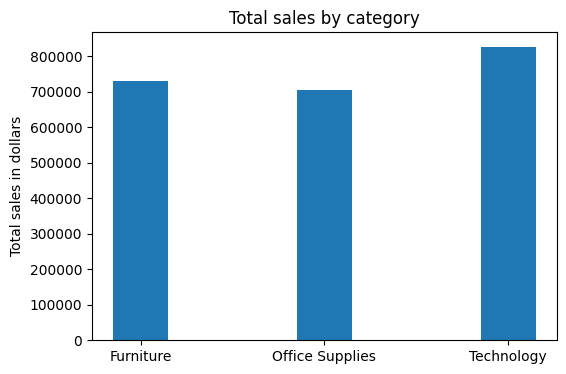

In [19]:
# Plot the bar chart for total sales for each category
plt.figure(figsize=(6, 4))
plt.bar(total_sales_category['Category'], total_sales_category['Sales$'], width=0.3)
plt.title('Total sales by category')
plt.ylabel('Total sales in dollars')
plt.show()

9 - $\textbf{Use a bar chart to visualize the number of sales per ship mode.}$

In [20]:
# Count the number of sales per ship mode
sales_ship_mode = sales_df['Ship Mode'].value_counts().reset_index()
sales_ship_mode.columns = ['Ship Mode', 'Number of Sales']
sales_ship_mode

,Ship Mode,Number of Sales
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


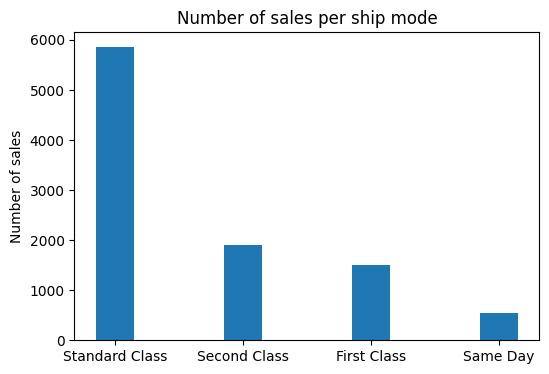

In [21]:
# Plot the bar chart for the number of sales per ship mode
plt.figure(figsize=(6, 4))
plt.bar(sales_ship_mode['Ship Mode'], sales_ship_mode['Number of Sales'], width=0.3)
plt.title('Number of sales per ship mode')
plt.ylabel('Number of sales')
plt.show()


10 - $\textbf{Identify the top three regions with the highest sales in the period 2017-2018}$

In [22]:
# Filter the data to keep only the period 2017-2018
filtered_data = sales_df[(sales_df['Order Date'].dt.year >= 2017) & (sales_df['Order Date'].dt.year <= 2018)]
filtered_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales$,Discount$,ShippingCost$,year-month-order
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,13.0980,6.985600,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,36.5970,19.518400,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,1.9006,0.389867,2017-06


In [23]:
# Group the data by region and calculate the total sales
sales_region = filtered_data.groupby('Region')['Sales$'].sum().reset_index()
sales_region

,Region,Sales$
0,Central,286600.5162
1,East,388640.7240
2,South,214999.7670
3,West,430602.1540


In [24]:
# Sort the regions by total sales in descending order and get the top three regions
top_regions = sales_region.sort_values(by='Sales$', ascending=False).head(3)
print(top_regions)

    Region       Sales$
3     West  430602.1540
1     East  388640.7240
0  Central  286600.5162
